https://stackoverflow.com/questions/34033785/normalize-values-in-dataframe

## Goals

## Libraries

In [2]:
import pandas as pd
import numpy as np
import spacy
import textblob
from gensim.models import word2vec
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
from string import punctuation
import gensim
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Neural Network
from sklearn.neural_network import MLPClassifier

import keras
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
import os
# for mac only: frog,blow,funk,glass,tink,submarine,purr,sosumi
def beep(audio): 
    os.system('afplay /System/Library/Sounds/' + audio +'.aiff')

# 1. Import and Add Basic Features

In [3]:
review = pd.read_csv('../data/boardgame/boardgame-comments-english.csv').sample(frac=.2)
review.columns = 'reviewer_id', 'game_id', 'rating', 'comment'

In [4]:
comments = review.comment

__Round Ratings__

In [5]:
# RATINGS ADJUSTMENT: ceiling >= .5 [or] floor < .5
review['rating'] = review.rating.apply(round)

__Show ReviewerID and GameID Counts__

In [6]:
review.head()

,reviewer_id,game_id,rating,comment
1229,89758,39856,8,First Edition
526222,47523,70323,8,Always entertaining!
31250,30805,10,6,Cute game of path-building. You're trying to h...
776264,191795,146021,3,Not my piece of cake. Much randomness and litt...
687018,51799,3076,8,I haven't played this game too much. But the t...


In [7]:
gamereview = review.groupby('reviewer_id')
# dflist = []
# for r in gamereview:
#     dflist.append(r[1])  
review.game_id.value_counts()[0:3]

822      2362
13       2196
30549    1900
Name: game_id, dtype: int64

In [8]:
del review['game_id']
del review['reviewer_id']

In [9]:
# Check for null values
review.isnull().any()

rating     False
comment    False
dtype: bool

# __2. Ratings Distribution__

_A. Bayesian Average_

B. Min/Max Transform (Sklearn Preprocessing Doesn't Apply)

_C. Normalize by User Ratings (Not Working Yet)_

https://stackoverflow.com/questions/34033785/normalize-values-in-dataframe

_D. Log Probability Distribution [NOT CORRECT]_

# 3. Natural Language Processing Features:

## _Spacy_

## _TextBlob_

_Pol = Sentiment Polarity (positive or negative word choice)_ <br>
_Subj = Sentiment Subjectivity (objective or subjective word choice)_

# 3. Visuals

# 4. Models

In [ ]:
features = ['c_len','caplet_count','punc_count','rating','sent_pol','sent_subj']

In [ ]:
%%time
y = review['rating']
X = review[features].drop('rating',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### _Cluster Model_

_Tries to find clusters in the data but doesnt predict anything_ (Not currently relevant)

## _Likelihood Function_

$$ p(Y\mid\theta) = \prod_i^n {p({y_i}\mid\theta)} $$

## _Maximum Likelihood Function_

https://wikimedia.org/api/rest_v1/media/math/render/svg/9dc95691ee450e85995f5e3263600cb904323ee8

$$ \frac{1}{n}\sum_i^n \ln{p({y_i}\mid\theta)} $$

### _Logistic Regression_

_Operates on probabilities_

# 5. Word Embedding - Word2Vec

In [4]:
%%time
review = pd.read_csv('../data/boardgame/boardgame-comments-english.csv').sample(frac=.01,random_state=42)
review.columns = 'reviewer_id', 'game_id', 'rating', 'comment'

# RATINGS ADJUSTMENT: ceiling >= .5 [or] floor < .5
review['rating'] = review.rating.map(round)

print('Total Comments: {}'.format(review.comment.count()))

Total Comments: 8416
CPU times: user 2.44 s, sys: 283 ms, total: 2.72 s
Wall time: 2.65 s


In [5]:
%%time
tokenize = lambda val: [b.lower() for b in textblob.TextBlob(val).words]
sentences_blob = review.comment.map(tokenize)
review['token'] = sentences_blob
beep('ping')

CPU times: user 4.87 s, sys: 16.1 ms, total: 4.88 s
Wall time: 6 s


In [6]:
%%time
load_model = False

if load_model:
    # # load model
    word_vec = word2vec.Word2Vec.load('full_word2vec_blob.bin')
    vec_size = word_vec.layer1_size
else: 
    vec_size = 50
    word_vec = word2vec.Word2Vec(
        sentences_blob,
        workers=4,     # Number of threads to run in parallel (if your computer does parallel processing).
        min_count=5,  # Minimum word count threshold.
        window=6,      # Number of words around target word to consider.
        sg=0,          # Use CBOW because our corpus is small.
        sample=1e-3 ,  # Penalize frequent words.
        size=vec_size,      # Word vector length.
        hs=1           # Use hierarchical softmax.
    )
    
    # save model
    word_vec.save('full_word2vec_blob.bin')

# List of words in model.
vocab = word_vec.wv.vocab.keys()
beep('ping')

CPU times: user 4.83 s, sys: 35.8 ms, total: 4.87 s
Wall time: 2.48 s


In [7]:
%%time
vec_new = np.array([.5 for i in range(0,vec_size)])
review['vectors'] = review.token.apply(lambda val: [word_vec[w] if w in vocab else vec_new for w in val])
beep('ping')

CPU times: user 1.6 s, sys: 308 ms, total: 1.91 s
Wall time: 2.75 s


### TBD

In [8]:
w1,w2,w3 = 'easy','player','good'
print(word_vec.most_similar(positive=[w1, w2], negative=[w3], topn=1))

w1 = 'easy'
print(word_vec.wv.most_similar(positive=w1,topn=3))

w1 = 'hard'
print(word_vec.wv.most_similar(positive=w1,topn=3))

[('players', 0.5597009658813477)]
[('simple', 0.7884871959686279), ('hard', 0.7558737993240356), ('difficult', 0.7427575588226318)]
[('difficult', 0.79841548204422), ('easy', 0.7558737993240356), ('eventually', 0.6670530438423157)]


__Cosine Similarity Function__

$$ cos(\theta) = \frac{A \bullet B} {\Vert A \Vert \Vert B \Vert} =  \frac{\sum_{i=1}^n A_i B_i}{\sqrt{ \sum_{i=1}^n A^2} \sqrt{ \sum_{i=1}^n B^2}} $$

__Version A. Raw Code__

In [9]:
euclidean_norm = lambda m: np.sqrt(np.array([a*a for a in m]).sum())
def similarity_vec(a,b):
    return (np.dot(a,b))/(euclidean_norm(a)*euclidean_norm(b))

hard_easy = similarity_vec(word_vec['hard'],word_vec['easy'])
hard_cat = similarity_vec(word_vec['hard'],word_vec['cat'])
easy_cat = similarity_vec(word_vec['easy'],word_vec['cat'])
easy_simple = similarity_vec(word_vec['easy'],word_vec['simple'])

print('HARD - EASY: {}'.format(hard_easy))
print('HARD - CAT: {}'.format(hard_cat))
print('EASY - CAT: {}'.format(easy_cat))
print('EASY - SIMPLE: {}'.format(easy_simple))

HARD - EASY: 0.7558738589286804
HARD - CAT: 0.13005948066711426
EASY - CAT: 0.06505037844181061
EASY - SIMPLE: 0.7884872555732727


__Version B. SKLearn__

______

******

# 6. Comprehensive Neural Network

_Slow Method_

_Fast Method_

In [55]:
%%time

pad, max_words = [0 for i in range(0,vec_size)], 100
def manual_pad(val):
    empty = max_words-len(val)
    for i in range(0,empty):
        val.append(pad)
    
    return [i for i in val[0:max_words+1]]

review.vectors=review.vectors.map(manual_pad)

CPU times: user 81.7 ms, sys: 2.24 ms, total: 84 ms
Wall time: 84.1 ms


_Create Train/Test Data_

In [122]:
# Jon's Code
from scipy.sparse import vstack

# version for separated X and y arrays, X is vectorized text 
def balance_data_vec(X, y):
    minsamples = y.shape[0]
    ratings = list(range(1,11))

    # get min number of samples per rating level: 
    #   we'll use this as our sample size for every rating level.
    for rating in ratings:
        sampsize = (y==rating).sum()
        if sampsize < minsamples:
            minsamples = sampsize

    # take same number of samples for each rating level.
    # sample randomly, create a new dataframe with all samples
    X_bal = []
    y_bal = []
    for rating in ratings:
        X_r = X['rating'==rating]
        y_r = y[y==rating]
        idx = list(range(X_r.shape[0]))
        np.random.shuffle( idx )
        
        # create the output arrays
        if type(X_bal) == list: 
            X_bal = X_r[idx[:minsamples],:]
            y_bal = np.array([rating]*minsamples)
            
        # add samples to output arrays
        else:
            X_bal = vstack((X_bal, X_r[idx[:minsamples],:]))
            y_bal = np.append(y_bal, np.array([rating]*minsamples), axis=0 )
            
    # shuffle all samples
    idx = list(range(X_bal.shape[0])) 
    np.random.shuffle( idx )
    X_bal = X_bal[idx,:]
    y_bal = y_bal[idx]
    
    return X_bal, pd.Series(y_bal)

In [119]:
%%time
y = review['rating']
X = pd.DataFrame([list(i[0]) for i in review.vectors])

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int).ravel(), test_size=0.33, random_state=42)

CPU times: user 128 ms, sys: 3.8 ms, total: 132 ms
Wall time: 131 ms


In [120]:
X_bal = X
X_bal['rating'] = review['rating'].values

In [121]:
X_bal,y_bal = balance_data_vec(X_bal,y)

52
463797    1
703580    1
783793    1
757921    1
253621    1
171856    1
200077    1
386038    1
228108    1
636041    1
644977    1
63353     1
49097     1
792885    1
433881    1
171845    1
631019    1
224075    1
62091     1
108664    1
563899    1
667010    1
361055    1
644986    1
537277    1
163274    1
413789    1
533547    1
689177    1
253620    1
220955    1
278598    1
629537    1
595740    1
668610    1
580844    1
230695    1
334301    1
580829    1
352025    1
446387    1
348110    1
171864    1
406967    1
343120    1
557151    1
76113     1
370809    1
313355    1
126269    1
439028    1
441806    1
Name: rating, dtype: int64


ValueError: Can only tuple-index with a MultiIndex

#### _C - Keras Sequential NN_

In [12]:
y_test = y_test.ravel()
y_train = y_train.ravel()

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [13]:
X_train.shape

(5638, 50)

In [15]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(vec_size,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))

In [16]:
batch_size = 5
epochs = 10

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              52224     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 11)                11275     
Total params: 1,113,099
Trainable params: 1,113,099
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

beep('ping')

Train on 5638 samples, validate on 2778 samples
Epoch 1/10
5638/5638 [==============================] - 14s 2ms/step - loss: 2.0421 - acc: 0.2504 - val_loss: 2.0009 - val_acc: 0.2603
Epoch 2/10
5638/5638 [==============================] - 14s 2ms/step - loss: 2.0298 - acc: 0.2691 - val_loss: 2.0170 - val_acc: 0.2891
Epoch 3/10
5638/5638 [==============================] - 14s 2ms/step - loss: 2.0256 - acc: 0.2731 - val_loss: 2.0363 - val_acc: 0.2801
Epoch 4/10
5638/5638 [==============================] - 15s 3ms/step - loss: 2.0364 - acc: 0.2728 - val_loss: 2.0593 - val_acc: 0.2577
Epoch 5/10
5638/5638 [==============================] - 14s 3ms/step - loss: 2.0292 - acc: 0.2726 - val_loss: 2.0183 - val_acc: 0.2991
Epoch 6/10
5638/5638 [==============================] - 14s 3ms/step - loss: 2.0157 - acc: 0.2824 - val_loss: 2.0870 - val_acc: 0.3006
Epoch 7/10
5638/5638 [==============================] - 14s 3ms/step - loss: 2.0326 - acc: 0.2921 - val_loss: 2.0827 - val_acc: 0.2855
Epoch 8

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.166683900004415
Test accuracy: 0.2670986321630711


In [21]:
# Jon's Code
from sklearn.metrics import confusion_matrix

def plot_confusion(y, y_pred, title):
    # rating levels
    ratings = list(range(1,11))

    # generate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # normalize matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # plot matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.magma)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(ratings))
    plt.xticks(tick_marks, ratings, rotation=45)
    plt.yticks(tick_marks, ratings)
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('Actual rating')
    plt.xlabel('Predicted rating');

In [23]:
y_predict = model.predict(X_test)

In [26]:
from keras.backend import argmax as kargmax
y_predict = np.argmax(model.predict(X_test),axis=1)
final_score = np.argmax(y_test,axis=1)

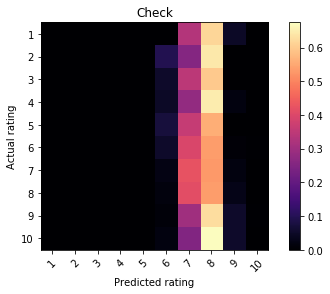

In [28]:
plot_confusion(final_score,y_predict,'Check')

## Word Similarity Visualization

## _Root Mean Squared Error_

$$ RMSE_{y} =  \sqrt{\frac{\sum_{i=1}^n {(\hat{y}_{i}- y_{i})}^2}{N}} $$

In [ ]:
RMSE = np.sqrt(np.sum(np.square(np.subtract(y_predict,y_actual)))/len(y_actual))
# print('Root Mean Squared Error: {}'.format(RMSE))

### _Notes_

Mathjacks / Tex